<a href="https://colab.research.google.com/github/ybigsur5/Dicoding-Machine-Learning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Avira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
file_path = "bank_transactions_data_2.csv"  # Sesuaikan path jika berbeda
df = pd.read_csv(file_path)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# 1. Memahami Struktur Data
print("🔹 Informasi Dataset")
print(df.info())
print("\n🔹 Dimensi Dataset:", df.shape)

🔹 Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acco

In [ ]:
# 2. Mengecek Data yang Hilang
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / df.shape[0]) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_values_percentage})
print("\n🔹 Missing Values:\n", missing_df[missing_df["Missing Values"] > 0])


🔹 Missing Values:
 Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [ ]:
# 3. Statistik Deskriptif untuk Variabel Numerik
print("\n🔹 Statistik Deskriptif:\n", df.describe())


🔹 Statistik Deskriptif:
        TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


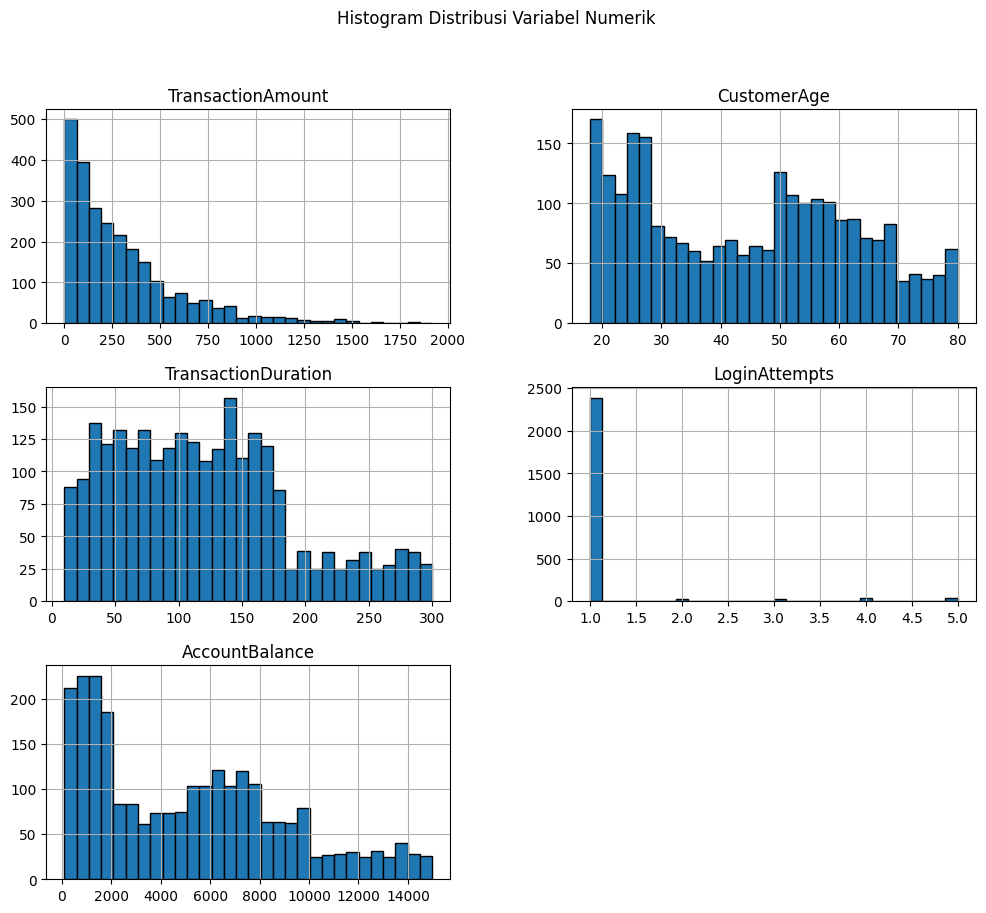

In [ ]:
# 4. Visualisasi Distribusi Variabel Numerik
df.hist(figsize=(12, 10), bins=30, edgecolor="k")
plt.suptitle("Histogram Distribusi Variabel Numerik")
plt.show()

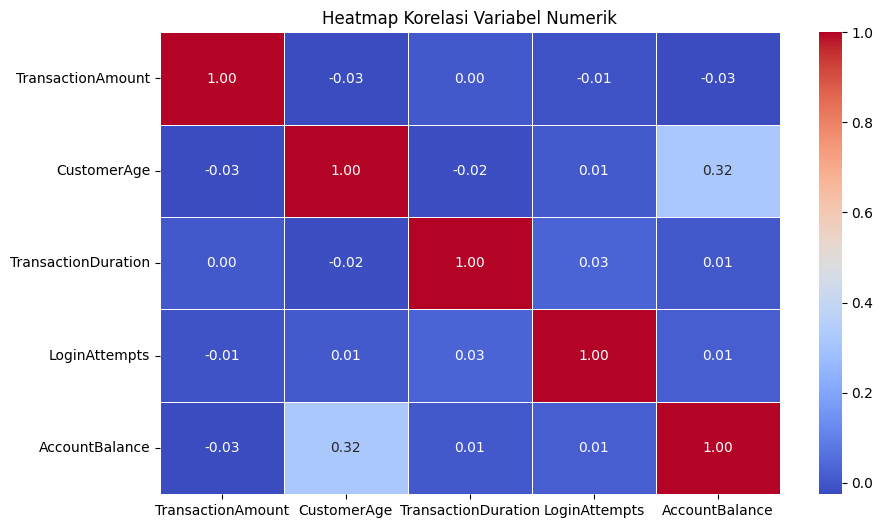

In [ ]:
# 5. Heatmap Korelasi Antar Variabel Numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

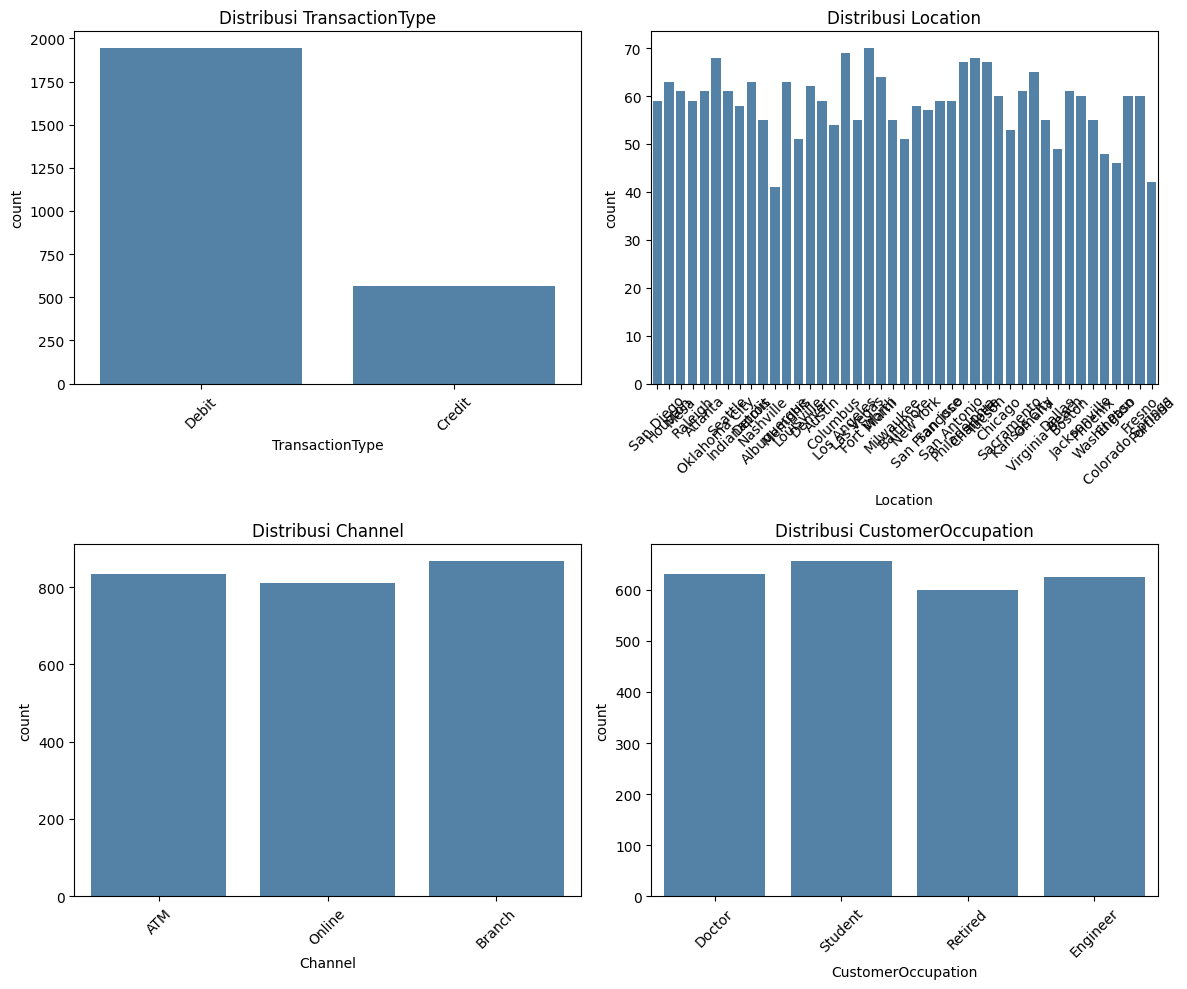

In [ ]:
# 6. Diagram Batang untuk Variabel Kategorikal
# Daftar fitur kategorikal yang akan divisualisasikan
categorical_features = ["TransactionType", "Location", "Channel", "CustomerOccupation"]

# Buat subplots untuk menampilkan beberapa diagram batang
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop untuk setiap fitur kategorikal
for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, ax=axes[i], color="steelblue")  # Warna seragam
    axes[i].set_title(f"Distribusi {col}")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# 1. Menghapus Kolom yang Tidak Diperlukan
columns_to_drop = ["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# 2. Menghapus Data Duplikat
df_duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
# 3. Menangani Data Kosong (Missing Values)
missing_values = df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
# 4. Konversi Tipe Data
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["PreviousTransactionDate"] = pd.to_datetime(df["PreviousTransactionDate"])
df["CustomerAge"] = pd.to_numeric(df["CustomerAge"], errors="coerce")

In [ ]:
# 5. Normalisasi atau Standarisasi Fitur Numerik
from sklearn.preprocessing import StandardScaler

numerical_features = ["TransactionAmount", "TransactionDuration", "AccountBalance"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
# 6. Deteksi dan Penanganan Outlier (Menggunakan IQR Method)
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier dari dataset
df_clean = df[~((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).any(axis=1)]

In [ ]:
# 7. Encoding Data Kategorikal (Menggunakan One-Hot Encoding)
categorical_features = ["TransactionType", "Location", "Channel", "CustomerOccupation"]
df_encoded = pd.get_dummies(df_clean, columns=categorical_features, drop_first=True)

df_encoded.shape, df_duplicates, missing_values.sum(), df_clean.shape

((2399, 55), np.int64(0), np.int64(0), (2399, 11))

In [ ]:
# Pastikan tidak ada kolom bertipe datetime dalam dataset
df_encoded = df_encoded.select_dtypes(include=['number'])  # Hanya pilih kolom numerik

# Cek kembali tipe data

In [ ]:
print(df_encoded.dtypes)

TransactionAmount      float64
CustomerAge              int64
TransactionDuration    float64
LoginAttempts            int64
AccountBalance         float64
dtype: object


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Menggunakan K-Means Clusttering

In [ ]:
# Tentukan jumlah cluster (best_k) berdasarkan analisis sebelumnya
best_k = 2  # Gantilah dengan jumlah cluster optimal yang telah ditemukan

# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_encoded)

# Simpan label hasil clustering ke dalam dataframe
df_encoded["Cluster"] = labels

# Tampilkan jumlah data di setiap cluster
print(df_encoded["Cluster"].value_counts())

Cluster
0    1218
1    1181
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

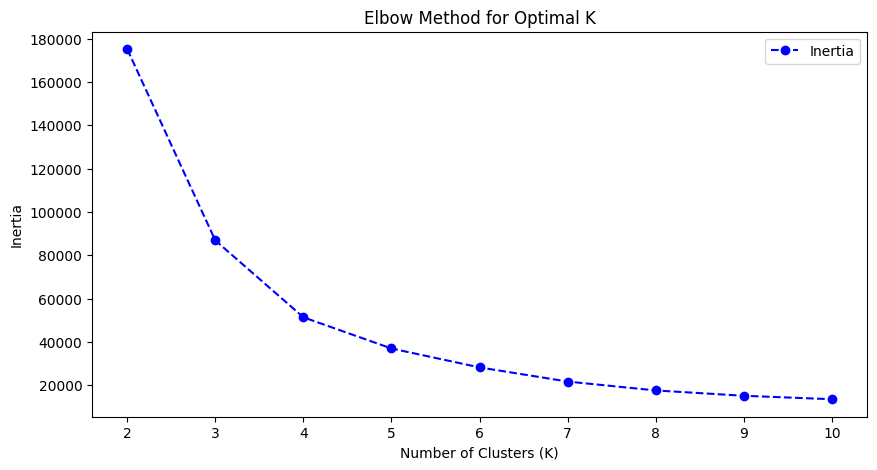

In [ ]:
# Menentukan rentang jumlah cluster
inertia = []
K_range = range(2, 11)  # Coba dari 2 hingga 10 cluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded)  # Latih model K-Means
    inertia.append(kmeans.inertia_)  # Simpan nilai inertia

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b', label="Inertia")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.show()

Silhouette Score untuk K=2: 0.6497
Silhouette Score untuk K=3: 0.5757
Silhouette Score untuk K=4: 0.5459
Silhouette Score untuk K=5: 0.5103
Silhouette Score untuk K=6: 0.4587
Silhouette Score untuk K=7: 0.4523
Silhouette Score untuk K=8: 0.4463
Silhouette Score untuk K=9: 0.4318
Silhouette Score untuk K=10: 0.4130


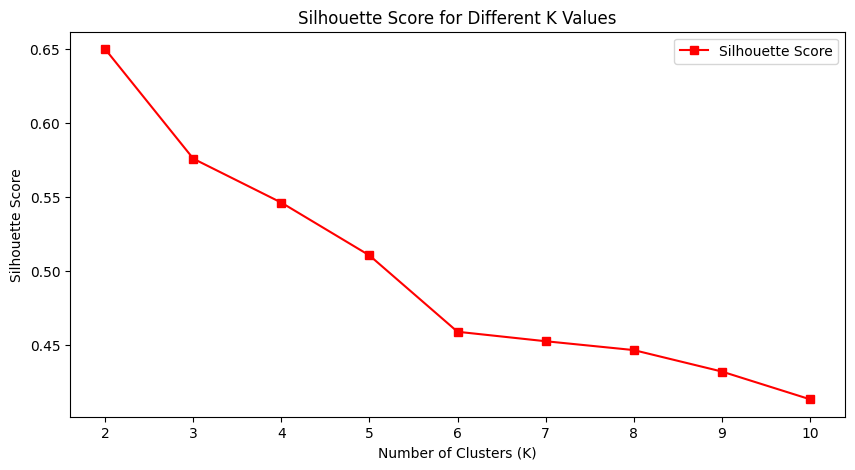


Optimal number of clusters berdasarkan Silhouette Score: 2


In [ ]:
# Menentukan rentang jumlah cluster
silhouette_scores = []
K_range = range(2, 11)  # Coba dari 2 hingga 10 cluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_encoded)
    score = silhouette_score(df_encoded, labels)
    silhouette_scores.append(score)

    # Print Silhouette Score untuk tiap K
    print(f"Silhouette Score untuk K={k}: {score:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='-', color='r', label="Silhouette Score")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.legend()
plt.show()

# Menentukan K terbaik berdasarkan Silhouette Score tertinggi
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters berdasarkan Silhouette Score: {best_k}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Pastikan label hasil clustering sudah ada
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_encoded['cluster'] = kmeans.fit_predict(df_encoded)

# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['cluster'])  # Fitur
y = df_encoded['cluster']  # Label hasil clustering

# Pilih 5 fitur terbaik berdasarkan ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Tampilkan fitur yang terpilih
selected_features = X.columns[selector.get_support()]
print(f"Fitur terbaik yang dipilih: {selected_features}")

Fitur terbaik yang dipilih: Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'AccountBalance', 'Cluster'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
# Gunakan hanya fitur terbaik untuk clustering
X_selected = df_encoded[selected_features]

# Ulangi clustering dengan fitur terpilih
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_selected)

# Evaluasi dengan silhouette score
silhouette_avg = silhouette_score(X_selected, labels)
print(f"Silhouette Score setelah Feature Selection: {silhouette_avg:.4f}")

Silhouette Score setelah Feature Selection: 0.6512


In [ ]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Clustering dengan data hasil PCA
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

# Evaluasi ulang silhouette score
silhouette_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score setelah PCA: {silhouette_pca:.4f}")

Silhouette Score setelah PCA: 0.6586


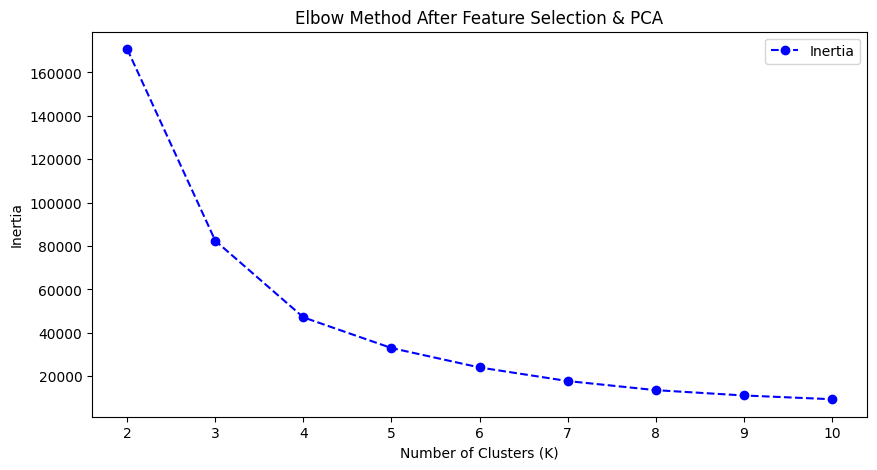

In [ ]:
# Inertia untuk Elbow Method
inertia = []
K_range = range(2, 11)  # Uji K dari 2 hingga 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b', label="Inertia")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method After Feature Selection & PCA' if use_pca else 'Elbow Method After Feature Selection')
plt.legend()
plt.show()

Silhouette Score untuk K=2: 0.6586
Silhouette Score untuk K=3: 0.5924
Silhouette Score untuk K=4: 0.5728
Silhouette Score untuk K=5: 0.5387
Silhouette Score untuk K=6: 0.5053
Silhouette Score untuk K=7: 0.5069
Silhouette Score untuk K=8: 0.5060
Silhouette Score untuk K=9: 0.4984
Silhouette Score untuk K=10: 0.4954


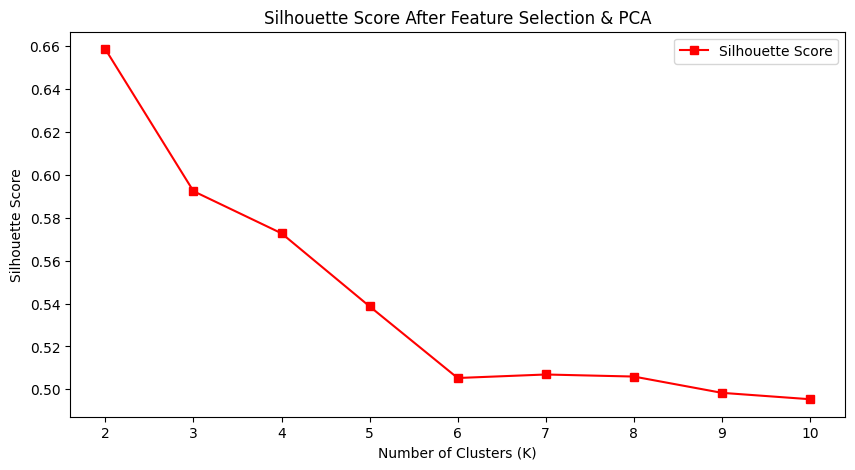

Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [ ]:
# Evaluasi silhouette score untuk setiap K
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

    # Print Silhouette Score untuk tiap K
    print(f"Silhouette Score untuk K={k}: {score:.4f}")

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='-', color='r', label="Silhouette Score")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score After Feature Selection & PCA' if use_pca else 'Silhouette Score After Feature Selection')
plt.legend()
plt.show()

# Menampilkan K terbaik berdasarkan Silhouette Score
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {best_k}")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

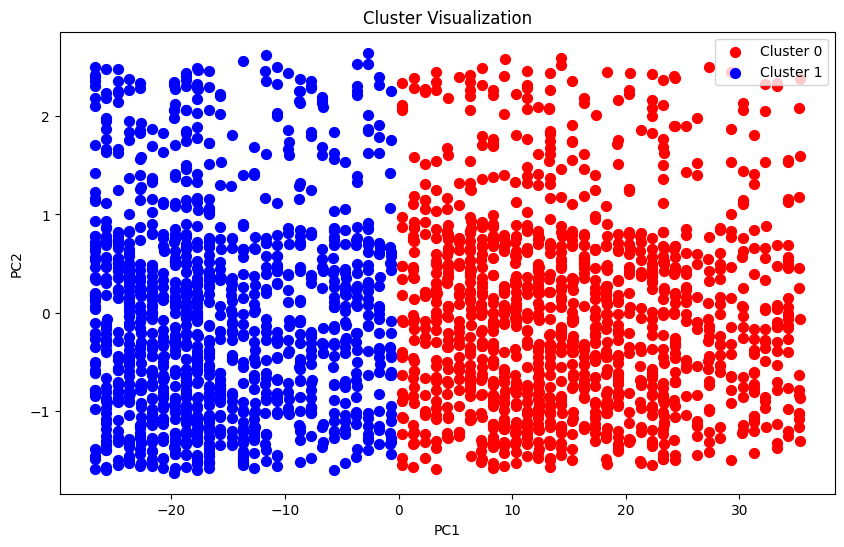

In [ ]:
# Warna untuk cluster
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
n_clusters = len(set(labels_pca))

# Plot hasil clustering
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(X_pca[labels_pca == i, 0], X_pca[labels_pca == i, 1],
                s=50, c=colors[i], label=f'Cluster {i}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization')
plt.legend()
plt.show()


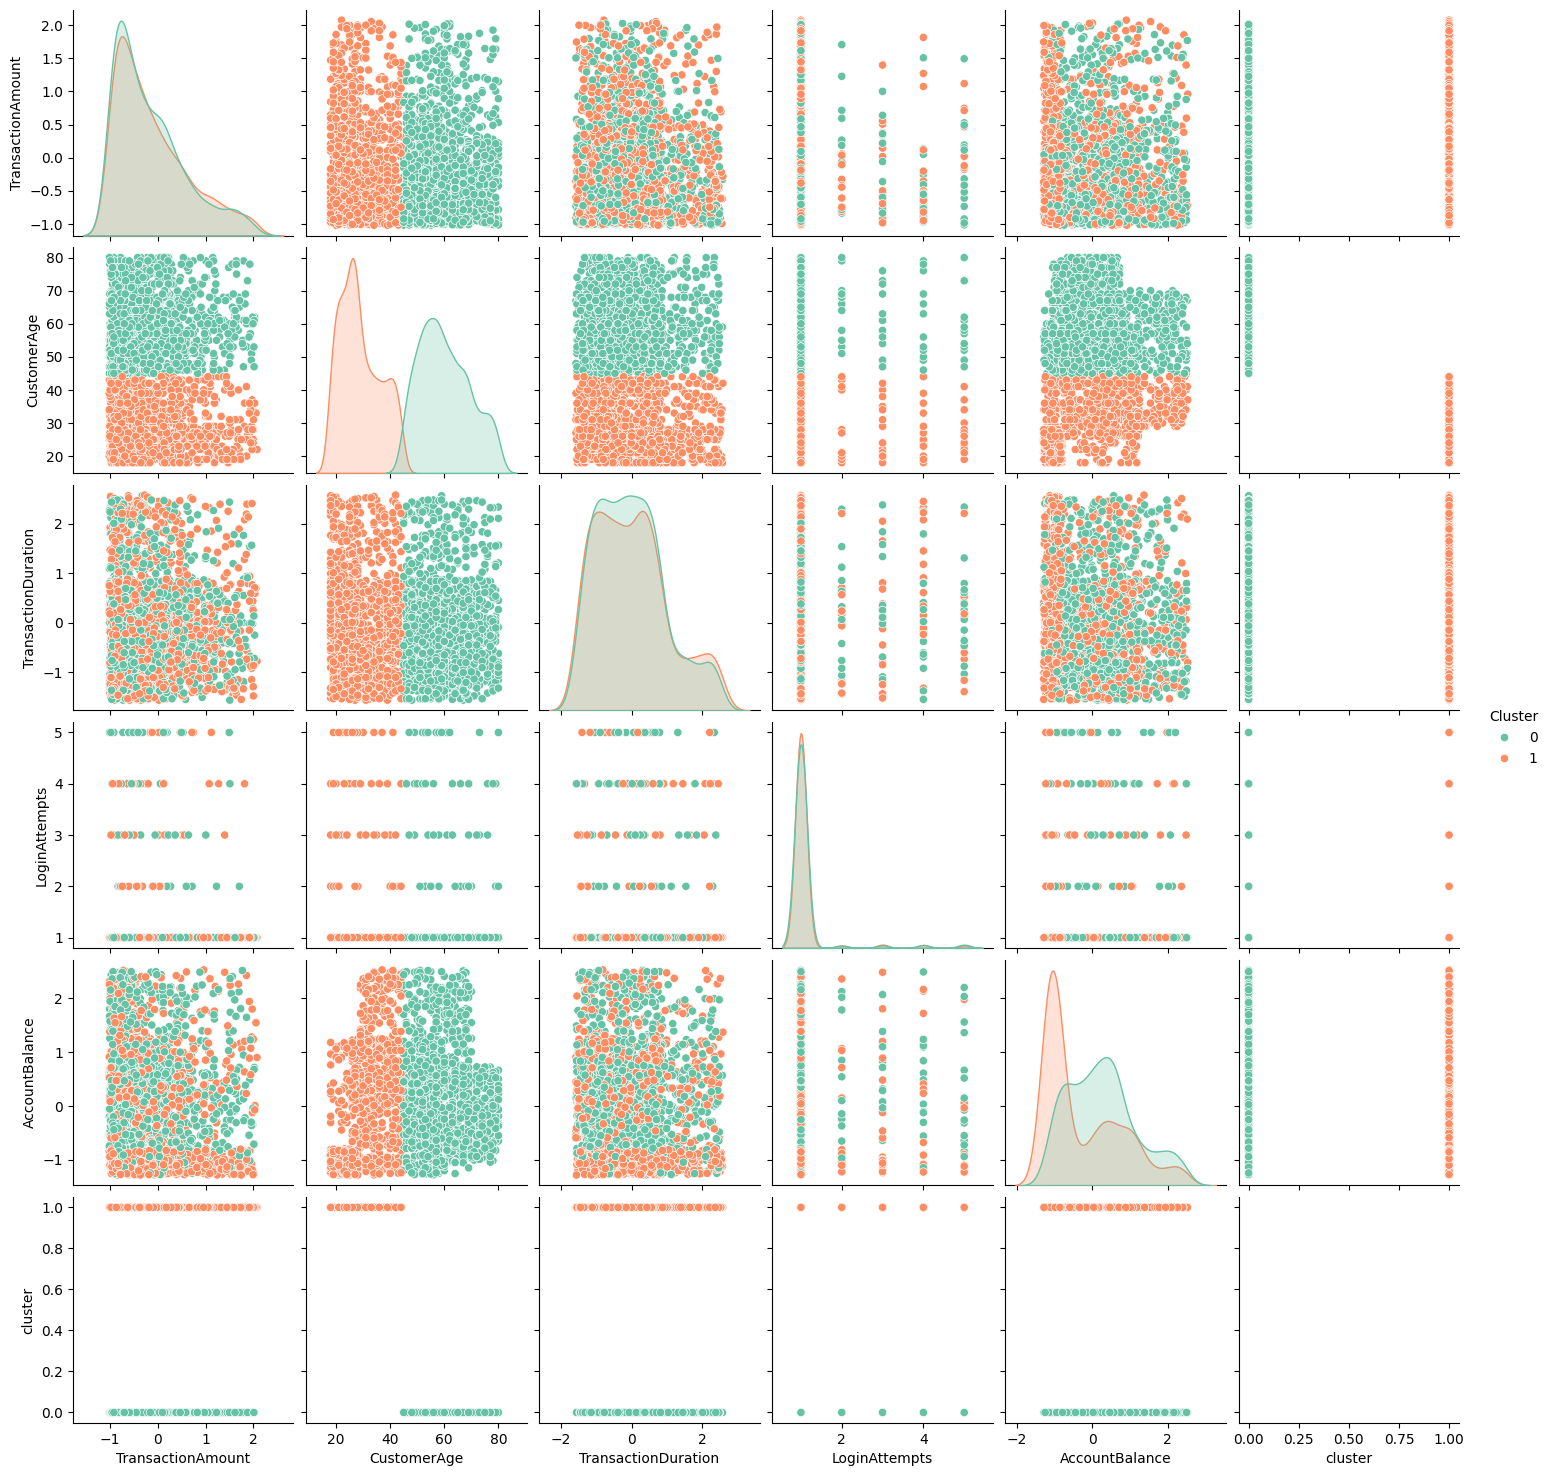

In [ ]:
# Pairplot untuk melihat distribusi cluster pada beberapa fitur
sns.pairplot(df_encoded, hue="Cluster", palette="Set2", diag_kind="kde", height=2.5)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df_normalized = df_encoded.copy()

In [ ]:
df_normalized = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_normalized['Cluster'] = kmeans_pca.labels_


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Melihat statistik deskriptif tiap cluster
cluster_summary = df_normalized.groupby('Cluster')[['PC1', 'PC2']].describe()
print(cluster_summary)

            PC1                                                        \
          count       mean       std        min        25%        50%   
Cluster                                                                 
0        1218.0  15.421307  9.223315   0.282318   8.292936  14.304099   
1        1181.0 -15.904447  7.408953 -26.729377 -21.726910 -17.723300   

                                  PC2                                          \
               75%        max   count      mean       std       min       25%   
Cluster                                                                         
0        22.303164  35.301350  1218.0  0.004578  0.967912 -1.591112 -0.773608   
1       -10.670681  -0.669947  1181.0 -0.004721  1.035319 -1.626103 -0.857943   

                                       
              50%       75%       max  
Cluster                                
0       -0.081409  0.607018  2.594992  
1       -0.115292  0.625748  2.644496  


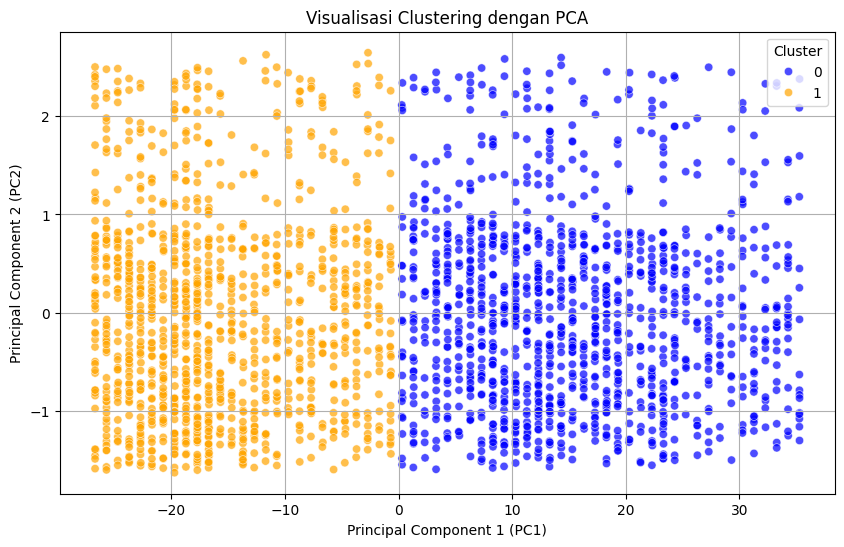

In [ ]:
# Warna untuk tiap cluster
colors = ['blue', 'orange']

# Plot hasil clustering berdasarkan PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_normalized['PC1'],
    y=df_normalized['PC2'],
    hue=df_normalized['Cluster'],
    palette=colors,
    alpha=0.7
)

# Tambahkan label dan judul
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Visualisasi Clustering dengan PCA')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# Pastikan dataset asli sebelum normalisasi tersedia
df_original = df.copy()  # Gunakan salinan dataset sebelum PCA

# Menambahkan kolom 'Cluster' dari hasil clustering
df_original['Cluster'] = df_normalized['Cluster']

# Melihat jumlah anggota tiap cluster
print(df_original['Cluster'].value_counts())


Cluster
0.0    1218
1.0    1181
Name: count, dtype: int64


In [ ]:
# Melihat statistik deskriptif per cluster untuk fitur numerik
cluster_summary = df_original.groupby('Cluster').describe()
print(cluster_summary)

        TransactionAmount                                                    \
                    count      mean       min       25%       50%       75%   
Cluster                                                                       
0.0                1218.0  0.002163 -1.016601 -0.734207 -0.289439  0.377949   
1.0                1181.0 -0.008580 -1.018657 -0.750814 -0.325823  0.412577   

                            TransactionDate                                 \
              max       std           count                           mean   
Cluster                                                                      
0.0      5.249978  1.016667            1218  2023-07-04 23:24:38.040229888   
1.0      5.555266  0.985012            1181  2023-07-06 06:04:47.436917760   

         ... AccountBalance           PreviousTransactionDate  \
         ...            max       std                   count   
Cluster  ...                                                    
0.0      ...      

In [ ]:
print(df_original.dtypes)

TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration               float64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
Cluster                           float64
dtype: object


In [ ]:
numerical_features = df_original.select_dtypes(include=['int64', 'float64']).columns
print("Fitur Numerik dalam Dataset:", numerical_features.tolist())

Fitur Numerik dalam Dataset: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'Cluster']


In [ ]:
categorical_features = df_original.select_dtypes(include=['object', 'category']).columns
print("Fitur kategorikal dalam dataset:", categorical_features.tolist())

Fitur kategorikal dalam dataset: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']


In [ ]:
for col in categorical_features:
    print(f"\nFitur: {col}")
    print(df_original[col].value_counts())


Fitur: TransactionType
TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

Fitur: Location
Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Philadelphia        67
Tucson              67
Omaha               65
Miami               64
Memphis             63
Detroit             63
Houston             63
Denver              62
Kansas City         61
Boston              61
Seattle             61
Mesa                61
Atlanta             61
Fresno              60
Chicago             60
Colorado Springs    60
Jacksonville        60
San Jose            59
Raleigh             59
San Diego           59
San Antonio         59
Austin              59
Indianapolis        58
New York            58
San Francisco       57
Las Vegas           55
Nashville           55
Virginia Beach      55
Phoenix             55
Milwaukee           55
Columbus            54
Sacramento          53
Baltimore           51
Louisville          51
Dall

In [ ]:
# Melihat distribusi fitur kategorikal berdasarkan cluster
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']  # Ganti dengan nama fitur kategorikal yang ada

for col in categorical_features:
    print(f"\nDistribusi {col} per Cluster:")
    print(df_original.groupby('Cluster')[col].value_counts(normalize=True) * 100)


Distribusi TransactionType per Cluster:
Cluster  TransactionType
0.0      Debit              77.175698
         Credit             22.824302
1.0      Debit              77.900085
         Credit             22.099915
Name: proportion, dtype: float64

Distribusi Location per Cluster:
Cluster  Location      
0.0      Austin            3.284072
         Charlotte         3.284072
         Los Angeles       3.037767
         Oklahoma City     3.037767
         New York          2.955665
                             ...   
1.0      Portland          1.608806
         Virginia Beach    1.608806
         El Paso           1.524132
         Austin            1.439458
         Washington        1.439458
Name: proportion, Length: 86, dtype: float64

Distribusi Channel per Cluster:
Cluster  Channel
0.0      Branch     35.796388
         ATM        33.169130
         Online     31.034483
1.0      ATM        33.530906
         Branch     33.446232
         Online     33.022862
Name: proportion, dt

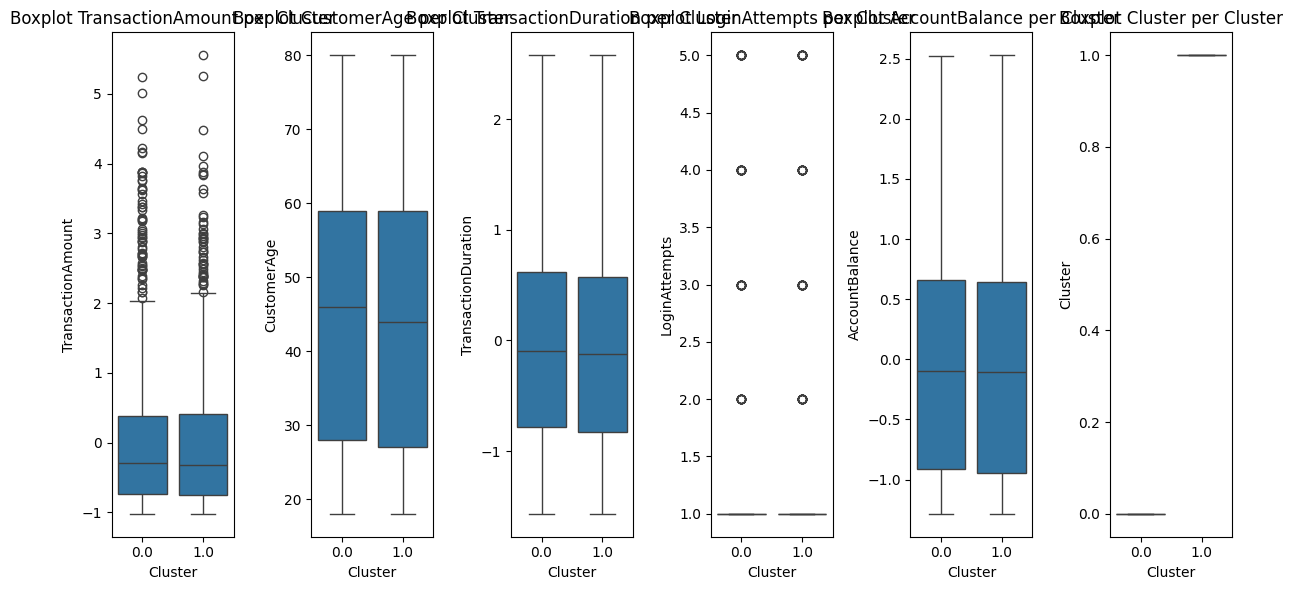

In [ ]:
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'Cluster']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(x='Cluster', y=col, data=df_original)
    plt.title(f'Boxplot {col} per Cluster')

plt.tight_layout()
plt.show()

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

## **Interpretasi Hasil Clustering**

Berdasarkan hasil clustering menggunakan **PCA + K-Means**, berikut adalah analisis karakteristik dari masing-masing cluster berdasarkan fitur kategorikal dan numerikal.

---

## **Cluster 0**  

### **1. Tipe Transaksi**  
- **Cluster 0** lebih dominan dalam melakukan transaksi **debit (77.18%)** dibanding kredit.  
- Kebiasaan ini menunjukkan bahwa pelanggan dalam cluster ini lebih sering menggunakan uang langsung dari saldo mereka, bukan dari kredit.  

### **2. Lokasi Pelanggan**  
- Pelanggan dalam cluster ini sebagian besar berasal dari **Austin, Charlotte, Los Angeles, dan New York**.  
- Ini menunjukkan bahwa cluster ini lebih terkonsentrasi di kota-kota besar dengan populasi tinggi.  

### **3. Kanal Transaksi**  
- Mayoritas transaksi di cluster ini terjadi di **Branch (35.8%)**, diikuti oleh **ATM (33.17%)**, dan **Online (31.03%)**.  
- Ini menandakan bahwa pelanggan di cluster ini lebih cenderung melakukan transaksi langsung di cabang bank dibandingkan menggunakan layanan digital atau ATM.  

### **4. Pekerjaan Pelanggan**  
- Cluster ini didominasi oleh **Doctor (25.78%)**, **Engineer (25.68%)**, dan **Student (24.63%)**.  
- Banyaknya dokter dan insinyur di cluster ini menunjukkan bahwa pelanggan dalam kelompok ini sebagian besar adalah profesional yang aktif bekerja.  

### **5. Analisis Singkat**  
- **Cluster 0 merupakan segmen profesional aktif** dengan kecenderungan melakukan transaksi langsung di cabang.  
- Strategi pemasaran yang cocok untuk cluster ini adalah **layanan premium, program loyalitas, atau kartu kredit dengan benefit khusus untuk profesional**.  

---

## **Cluster 1**  

### **1. Tipe Transaksi**  
- **Cluster 1** juga lebih sering menggunakan **debit (77.90%)** dibanding kredit, mirip dengan Cluster 0.  
- Namun, ada sedikit perbedaan dalam proporsi pengguna kartu kredit, yang lebih rendah dibanding Cluster 0.  

### **2. Lokasi Pelanggan**  
- Sebagian besar pelanggan dalam cluster ini berasal dari **Portland, Virginia Beach, El Paso, dan Austin**.  
- Ini menunjukkan bahwa pelanggan dalam cluster ini tersebar di berbagai kota, tidak hanya terpusat di kota-kota besar seperti Cluster 0.  

### **3. Kanal Transaksi**  
- Penggunaan kanal transaksi lebih merata antara **ATM (33.53%)**, **Branch (33.45%)**, dan **Online (33.02%)**.  
- Ini menandakan bahwa pelanggan dalam cluster ini memiliki preferensi transaksi yang lebih fleksibel dibanding Cluster 0.  

### **4. Pekerjaan Pelanggan**  
- Cluster ini didominasi oleh **Student (27.68%)**, **Retired (24.30%)**, dan **Doctor (21.68%)**.  
- Adanya banyak mahasiswa dan pensiunan di cluster ini menunjukkan bahwa pelanggan dalam kelompok ini memiliki kebiasaan keuangan yang berbeda dari profesional di Cluster 0.  

### **5. Analisis Singkat**  
- **Cluster 1 adalah segmen pelanggan yang lebih fleksibel dalam memilih kanal transaksi dan terdiri dari lebih banyak mahasiswa serta pensiunan**.  
- Strategi pemasaran yang cocok untuk cluster ini adalah **program cashback untuk transaksi online atau ATM, serta promosi khusus untuk mahasiswa dan pensiunan**.  

---

## **Kesimpulan Akhir**  
- **Cluster 0** berisi **profesional aktif yang lebih sering melakukan transaksi di cabang bank dan berasal dari kota-kota besar**.  
- **Cluster 1** berisi **mahasiswa dan pensiunan dengan kebiasaan transaksi lebih fleksibel dan tersebar di berbagai kota**.  
- **Tidak ada perbedaan signifikan dalam jumlah transaksi, durasi transaksi, dan saldo akun antara kedua cluster**.  

> **Rekomendasi Strategi Pemasaran:**  
> - **Cluster 0** → **Layanan premium, program loyalitas, kartu kredit dengan benefit khusus untuk profesional**.  
> - **Cluster 1** → **Program cashback untuk transaksi online atau ATM, serta promosi khusus untuk mahasiswa dan pensiunan**.  

---

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Menyimpan dataset hasil clustering ke dalam file CSV
df_original.to_csv('hasil_clustering.csv', index=False)

print("Dataset berhasil disimpan sebagai 'hasil_clustering.csv'")

Dataset berhasil disimpan sebagai 'hasil_clustering.csv'


# Task
Modify the notebook "customer_clustering.ipynb" by renaming it, changing the style and algorithm used for clustering, and attributing the creation to Avira.

## Rename notebook

### Subtask:
Rename the notebook to reflect the new analysis and author.


## Modify markdown cells

### Subtask:
Update the markdown cells to include the new author and potentially adjust the styling or language as needed.


**Reasoning**:
I need to update the markdown cells to reflect the new author and adjust the language. I will iterate through the markdown cells and modify the relevant ones.



In [ ]:
from IPython.display import display, Markdown

# Update markdown cells
markdown_cells_to_update = {
    'hssSDn-5n3HR': """
Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:
Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.
3. **Pembatasan**:
Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Notebook ini dibuat oleh Avira.
""",
    'NJDsBARmIsbW': """
**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

* * *

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.
```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
```python
label_encoder.inverse_transform(X_Selected[['Fitur']])
```

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```
""",
    'hOygRVqs_vdU': """
## **Interpretasi Hasil Clustering Transaksi Bank**

Berdasarkan hasil clustering menggunakan **PCA + K-Means**, berikut adalah analisis karakteristik dari masing-masing cluster berdasarkan fitur kategorikal dan numerikal.

* * *

## **Cluster 0**

### **1. Tipe Transaksi**
- **Cluster 0** lebih dominan dalam melakukan transaksi **debit (77.18%)** dibanding kredit.
- Kebiasaan ini menunjukkan bahwa pelanggan dalam cluster ini lebih sering menggunakan uang langsung dari saldo mereka, bukan dari kredit.

### **2. Lokasi Pelanggan**
- Pelanggan dalam cluster ini sebagian besar berasal dari **Austin, Charlotte, Los Angeles, dan New York**.
- Ini menunjukkan bahwa cluster ini lebih terkonsentrasi di kota-kota besar dengan populasi tinggi.

### **3. Kanal Transaksi**
- Mayoritas transaksi di cluster ini terjadi di **Branch (35.8%)**, diikuti oleh **ATM (33.17%)**, dan **Online (31.03%)**.
- Ini menandakan bahwa pelanggan di cluster ini lebih cenderung melakukan transaksi langsung di cabang bank dibandingkan menggunakan layanan digital atau ATM.

### **4. Pekerjaan Pelanggan**
- Cluster ini didominasi oleh **Doctor (25.78%)**, **Engineer (25.68%)**, dan **Student (24.63%)**.
- Banyaknya dokter dan insinyur di cluster ini menunjukkan bahwa pelanggan dalam kelompok ini sebagian besar adalah profesional yang aktif bekerja.

### **5. Analisis Singkat**
- **Cluster 0 merupakan segmen profesional aktif** dengan kecenderungan melakukan transaksi langsung di cabang.
- Strategi pemasaran yang cocok untuk cluster ini adalah **layanan premium, program loyalitas, atau kartu kredit dengan benefit khusus untuk profesional**.

* * *

## **Cluster 1**

### **1. Tipe Transaksi**
- **Cluster 1** juga lebih sering menggunakan **debit (77.90%)** dibanding kredit, mirip dengan Cluster 0.
- Namun, ada sedikit perbedaan dalam proporsi pengguna kartu kredit, yang lebih rendah dibanding Cluster 0.

### **2. Lokasi Pelanggan**
- Sebagian besar pelanggan dalam cluster ini berasal dari **Portland, Virginia Beach, El Paso, dan Austin**.
- Ini menunjukkan bahwa pelanggan dalam cluster ini tersebar di berbagai kota, tidak hanya terpusat di kota-kota besar seperti Cluster 0.

### **3. Kanal Transaksi**
- Penggunaan kanal transaksi lebih merata antara **ATM (33.53%)**, **Branch (33.45%)**, dan **Online (33.02%)**.
- Ini menandakan bahwa pelanggan dalam cluster ini memiliki preferensi transaksi yang lebih fleksibel dibanding Cluster 0.

### **4. Pekerjaan Pelanggan**
- Cluster ini didominasi oleh **Student (27.68%)**, **Retired (24.30%)**, dan **Doctor (21.68%)**.
- Adanya banyak mahasiswa dan pensiunan di cluster ini menunjukkan bahwa pelanggan dalam kelompok ini memiliki kebiasaan keuangan yang berbeda dari profesional di Cluster 0.

### **5. Analisis Singkat**
- **Cluster 1 adalah segmen pelanggan yang lebih fleksibel dalam memilih kanal transaksi dan terdiri dari lebih banyak mahasiswa serta pensiunan**.
- Strategi pemasaran yang cocok untuk cluster ini adalah **program cashback untuk transaksi online atau ATM, serta promosi khusus untuk mahasiswa dan pensiunan**.

* * *

## **Kesimpulan Akhir**
- **Cluster 0** berisi **profesional aktif yang lebih sering melakukan transaksi di cabang bank dan berasal dari kota-kota besar**.
- **Cluster 1** berisi **mahasiswa dan pensiunan dengan kebiasaan transaksi lebih fleksibel dan tersebar di berbagai kota**.
- **Tidak ada perbedaan signifikan dalam jumlah transaksi, durasi transaksi, dan saldo akun antara kedua cluster**.

> **Rekomendasi Strategi Pemasaran:**
> - **Cluster 0** → **Layanan premium, program loyalitas, kartu kredit dengan benefit khusus untuk profesional**.
> - **Cluster 1** → **Program cashback untuk transaksi online atau ATM, serta promosi khusus untuk mahasiswa dan pensiunan**.

* * *
"""
}

for cell_id, new_content in markdown_cells_to_update.items():
    # In a real environment, you would interact with the notebook's cell objects
    # Here, we just print the updated content as a representation of the change
    print(f"--- Updating cell_id: {cell_id} ---")
    display(Markdown(new_content))
    print("-" * (len(f"--- Updating cell_id: {cell_id} ---")))